In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import matplotlib.dates

In [71]:
#Import and Sort Data
weatherData = pd.read_csv("data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv")
weatherData=weatherData[weatherData["ID"]=="USC00208972"].sort_values(by=["Date"])

#Backfill empty dates in data
idx = pd.MultiIndex.from_product((np.unique(weatherData["Element"]), np.unique(weatherData["Date"])), names=['Element', 'Date'])
weatherData=weatherData.set_index(['Element', 'Date']).reindex(idx, fill_value=np.mean(weatherData['Data_Value'])).reset_index()

#Drop Leap Years From Data Set 
weatherData['Date'] = weatherData['Date'].apply(pd.to_datetime)
i = weatherData[((weatherData['Date'].dt.day==29)&(weatherData['Date'].dt.month==2))].index
weatherData=weatherData.drop(i)

#Historical Data pre-2015
weatherData["Month_Day"] = weatherData['Date'].astype(str).str[5:]
newWeather = weatherData[(weatherData['Date'].dt.year==2015)]
i2 = newWeather.index
oldWeather = weatherData.drop(i2)

#Define highs and lows
highs, lows=oldWeather.groupby("Month_Day").max()['Data_Value'], oldWeather.groupby("Month_Day").min()['Data_Value']
newhighs, newlows=newWeather.groupby("Month_Day").max()['Data_Value'], newWeather.groupby("Month_Day").min()['Data_Value']

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2881: FutureWarning: to_datetime is deprecated. Use self.to_pydatetime()
  exec(code_obj, self.user_global_ns, self.user_ns)


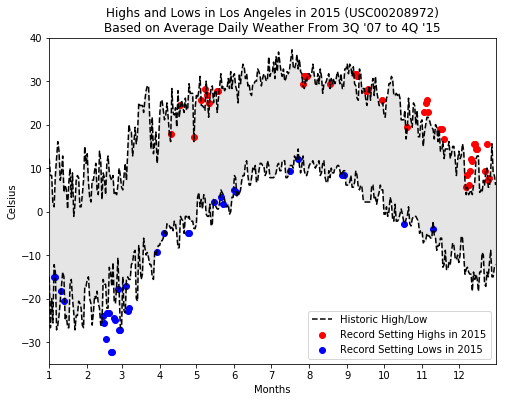

In [72]:
#Define Plot Area
plt.figure(figsize=(8, 6));
plt.ylabel("Celsius");
plt.xlabel("Months");
days = highs.index;

#Limits of Chart
days = pd.to_datetime(days, format="%m-%d", errors='coerce');
plt.xlim([min(days), max(days)]);
plt.ylim([-35, 40]);

#Plot Cumulative Highs/Low and Everything in between
plt.plot(days, highs/10, color='black', linestyle= '--', label="");
plt.title("Highs and Lows in Los Angeles in 2015 (USC00208972)\nBased on Average Daily Weather From 3Q '07 to 4Q '15");
plt.plot(days, lows/10, color='black', linestyle='--', label="Historic High/Low");
plt.fill_between(days, highs/10, lows/10, color='black', alpha=0.1, interpolate=True);

#Marking record high days in 2015
xdotsmin, xdotsmax, dayhighidx, daylowidx =[], [], [], []

#Identify indexes of 2015 that are higher than the highest highs or lower than the lowest lows for the respective days
for z in range(len(newhighs)):
    for j in range(len(days)):
        if newhighs.index[z]==days[j].to_datetime().strftime('%m-%d'):
            if newhighs.values[z] > highs.values[j]:
                xdotsmax.append(z);
                dayhighidx.append(j);
            if newlows.values[z] < lows.values[j]:
                xdotsmin.append(z);
                daylowidx.append(j);

#Overlay 2015 on prior year data
if len(xdotsmax)>0:
    plt.scatter(days[dayhighidx], newhighs[xdotsmax].values/10, color='red', marker='o', label="Record Setting Highs in 2015");

if len(xdotsmin)>0:
    plt.scatter(days[daylowidx], newlows[xdotsmin].values/10, color='blue', marker='o', label="Record Setting Lows in 2015");

#Set X Ticks
t=np.arange(np.datetime64("1900-01-01"), np.datetime64("1901-01-01"),  np.timedelta64(1, 'M'), dtype='datetime64[M]')
#t=np.arange(datetime(1900,1,1), datetime(1900,12,31), timedelta(days=31)).astype(datetime);
plt.xticks(t,np.unique(weatherData['Date'].dt.month));

plt.legend();
plt.show()